Evaluation Project - 3

# Avacado Project

Problem Statement:  
    
Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:  

Date - The date of the observation  
AveragePrice - the average price of a single avocado  
type - conventional or organic  
year - the year  
Region - the city or region of the observation  
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold  
4225 - Total number of avocados with PLU 4225 sold  
4770 - Total number of avocados with PLU 4770 sold

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_av=pd.read_csv("Avocado.csv",index_col=0)
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# First 5 rows
df_av.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Last 5 rows
df_av.tail(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,1/7/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# Sample
df_av.sample(4)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
12,10/4/2015,1.25,28692.21,1368.83,5986.74,30.75,21305.89,739.33,20566.56,0.00,organic,2015,Denver
46,2/7/2016,0.69,593759.78,307135.68,151185.73,13083.51,122354.86,61003.56,61340.53,10.77,conventional,2016,SouthCarolina
8,11/5/2017,1.37,115630.87,9707.40,54119.19,58.11,51746.17,19894.72,31804.78,46.67,conventional,2017,BuffaloRochester
43,3/5/2017,1.19,273485.30,53961.57,151537.00,745.71,67241.02,66399.83,841.19,0.00,conventional,2017,HarrisburgScranton


In [6]:
df_av.shape

(18249, 13)

There are 18249 rows and 14 columns present in this dataset.

# EDA

In [7]:
# Column Names
df_av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df_av.shape

(18249, 13)

In [9]:
# Column Data Types
df_av.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# Checking for null values
df_av.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Checking for null values
df_av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

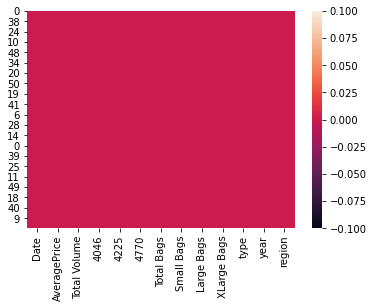

In [12]:
# Visualizing the null values
sns.heatmap(df_av.isnull())

In [13]:
df_av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
# Mean of our target variable 'region'
df_av.groupby('region').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929
Atlanta,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929
BaltimoreWashington,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929
Boise,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929
Boston,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929
BuffaloRochester,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929
California,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929
Charlotte,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929
Chicago,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929


In [15]:
# Mean of our target variable 'AveragePrice'
df_av.groupby('AveragePrice').mean()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,,,,,,,,,
0.44,64057.040,223.840,4748.880,0.000,59084.320,638.68,58445.640,0.00,2017.0
0.46,2200550.270,1200632.860,531226.650,18324.930,450365.830,113752.17,330583.100,6030.56,2017.0
0.48,50890.730,717.570,4138.840,0.000,46034.320,1385.06,44649.260,0.00,2017.0
0.49,590865.730,369283.795,145665.525,5821.230,70095.180,35674.51,34420.670,0.00,2016.0
0.51,868936.546,624146.334,144483.228,5683.116,94623.868,36911.05,57712.818,0.00,2016.4
...,...,...,...,...,...,...,...,...,...
3.04,12656.320,419.060,4851.900,145.090,7240.270,6960.97,279.300,0.00,2017.0
3.05,2068.260,1043.830,77.360,0.000,947.070,926.67,20.400,0.00,2017.0
3.12,19043.800,5898.490,10039.340,0.000,3105.970,3079.30,26.670,0.00,2016.0


In [16]:
df_av.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

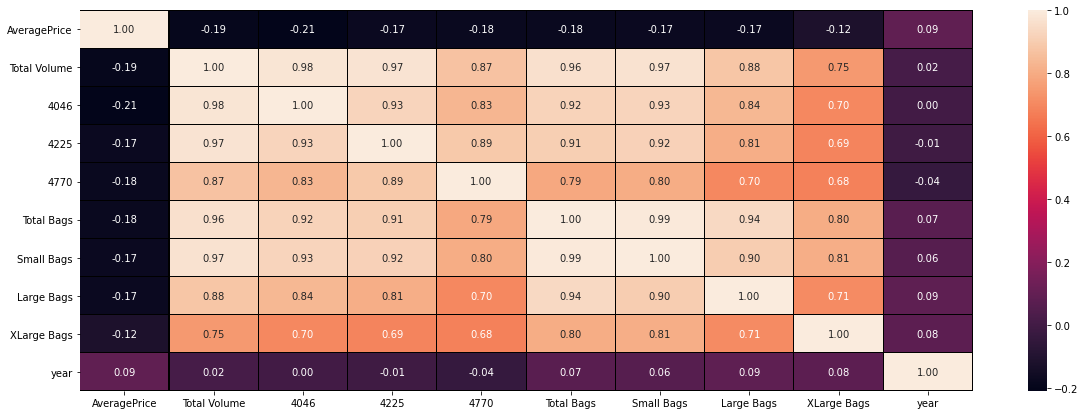

In [17]:
# Visualizing df_av.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_av.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

In [18]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [19]:
# Unique values of columns
df_av.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [20]:
# Unique values of target variable column
df_av['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [21]:
df_av['region'].value_counts()

MiamiFtLauderdale      338
Nashville              338
SouthCarolina          338
Spokane                338
Orlando                338
Portland               338
HartfordSpringfield    338
Albany                 338
Plains                 338
Sacramento             338
Northeast              338
Tampa                  338
SanDiego               338
NewYork                338
Indianapolis           338
Columbus               338
BuffaloRochester       338
Louisville             338
Syracuse               338
CincinnatiDayton       338
Roanoke                338
Houston                338
Boston                 338
Midsouth               338
California             338
TotalUS                338
PhoenixTucson          338
NorthernNewEngland     338
SouthCentral           338
RichmondNorfolk        338
Boise                  338
SanFrancisco           338
NewOrleansMobile       338
DallasFtWorth          338
Denver                 338
Pittsburgh             338
BaltimoreWashington    338
S

In [22]:
#Checking for empty observations
df_av.loc[df_av['region'] == " "]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No empty observations.

In [23]:
# Unique values of target variable column
df_av['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [24]:
df_av['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [25]:
#Checking for empty observations
df_av.loc[df_av['AveragePrice'] == " "]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No empty observations.

# Feature Engineering

We shall extract the Day and Month from Date column to conduct better data visualization.

In [26]:
# Converting object to datetime
df_av["Date"]=pd.to_datetime(df_av["Date"])

In [27]:
df_av.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [28]:
#Extracting month from Date column
df_av["Month"]=df_av["Date"].dt.month

In [29]:
#Extracting day from Date column
df_av["Day"]=df_av["Date"].dt.day

In [30]:
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Now we have separate day, month and year columns. We now do not need the Date column so we shall drop the column.

In [31]:
#Droping Date column
df_av = df_av.drop(["Date"],axis=1)

# Data Visualization

In [32]:
df_av.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [33]:
df_av.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

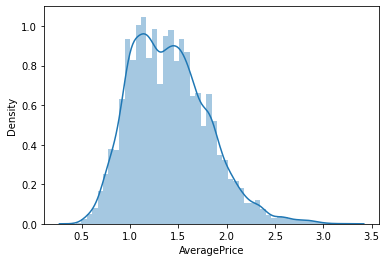

In [34]:
sns.distplot(df_av['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

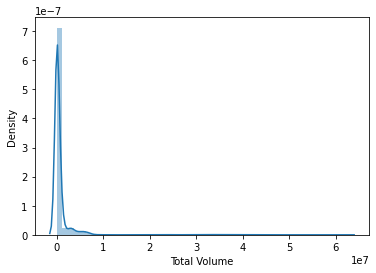

In [35]:
sns.distplot(df_av['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

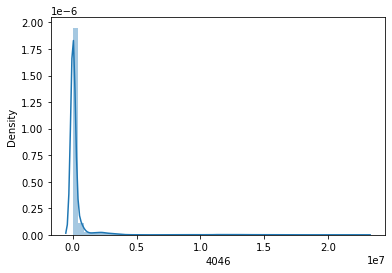

In [36]:
sns.distplot(df_av['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

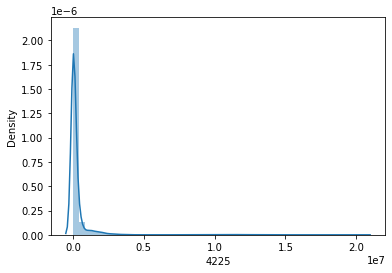

In [37]:
sns.distplot(df_av['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

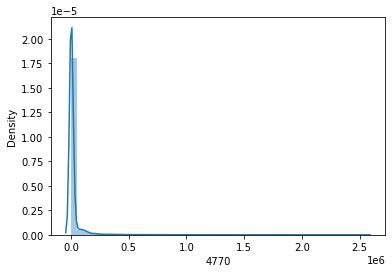

In [38]:
sns.distplot(df_av['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

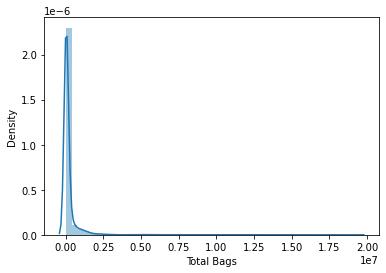

In [39]:
sns.distplot(df_av['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

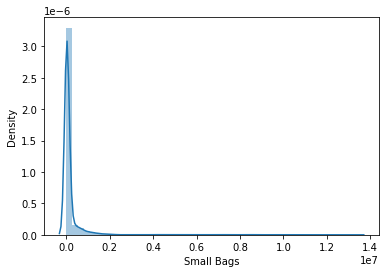

In [40]:
sns.distplot(df_av['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

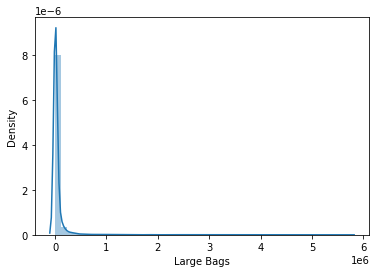

In [41]:
sns.distplot(df_av['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

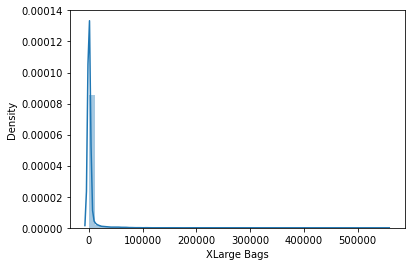

In [42]:
sns.distplot(df_av['XLarge Bags'])

<AxesSubplot:xlabel='Day', ylabel='count'>

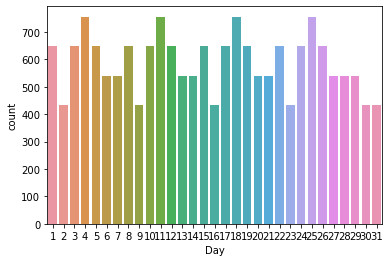

In [43]:
sns.countplot(df_av['Day'])

<AxesSubplot:xlabel='Month', ylabel='count'>

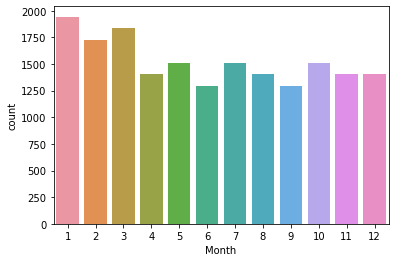

In [44]:
sns.countplot(df_av['Month'])

<AxesSubplot:xlabel='year', ylabel='count'>

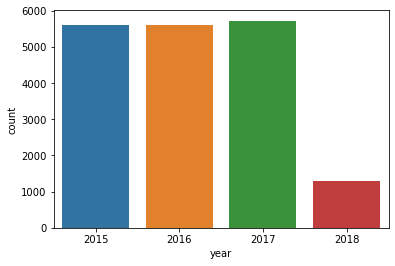

In [45]:
sns.countplot(df_av['year'])

<AxesSubplot:xlabel='type', ylabel='count'>

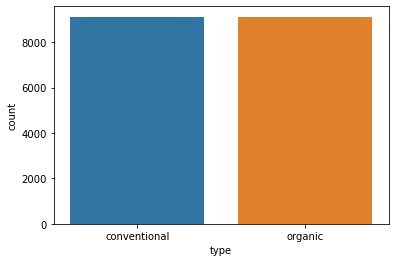

In [46]:
sns.countplot(df_av['type'])

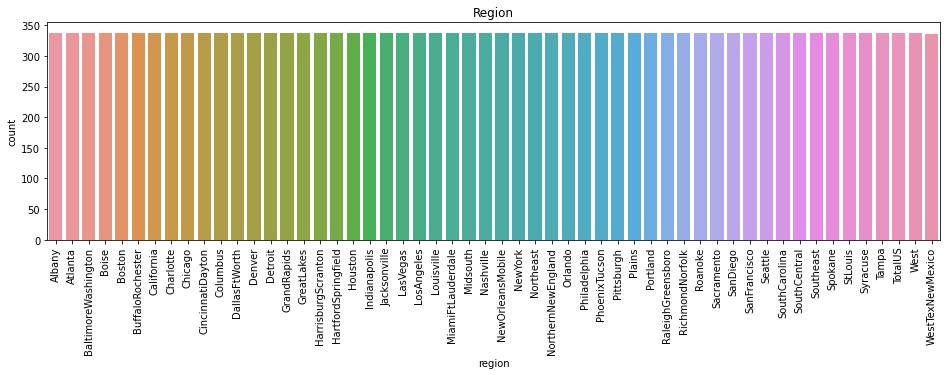

In [47]:
plt.figure(figsize=(16,4))
sns.countplot(df_av["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Comparision between AveragePrice and Total Volume'}, xlabel='AveragePrice', ylabel='Total Volume'>

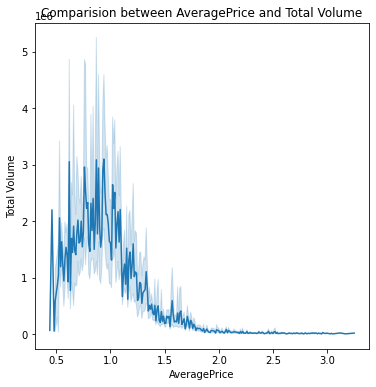

In [48]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df_av['AveragePrice'],df_av['Total Volume'])

<AxesSubplot:title={'center':'Comparision between AveragePrice and Total Bags'}, xlabel='AveragePrice', ylabel='Total Bags'>

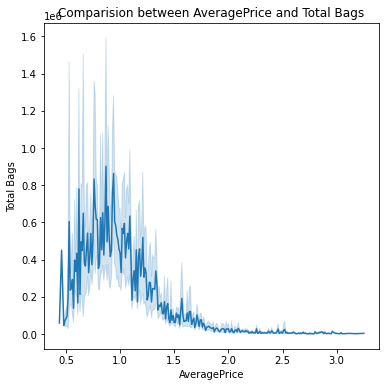

In [49]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and Total Bags')
sns.lineplot(df_av['AveragePrice'],df_av['Total Bags'])

<AxesSubplot:title={'center':'Comparision between Year and Type'}, xlabel='year', ylabel='count'>

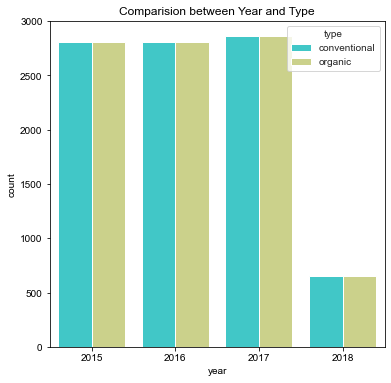

In [50]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Year and Type')
sns.set_style('whitegrid')
sns.countplot(x='year',hue='type',data=df_av,palette='rainbow')

<AxesSubplot:title={'center':'Comparision between Month and Type'}, xlabel='Month', ylabel='count'>

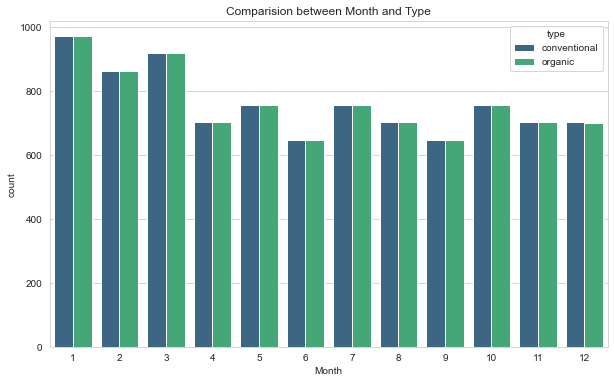

In [51]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Month and Type')
sns.set_style('whitegrid')
sns.countplot(x='Month',hue='type',data=df_av,palette='viridis')

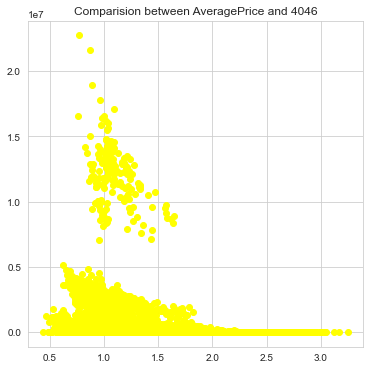

In [52]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4046')
plt.scatter('AveragePrice','4046',data=df_av,color='yellow')

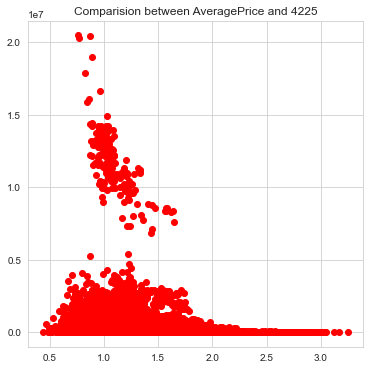

In [53]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4225')
plt.scatter('AveragePrice','4225',data=df_av,color='red')

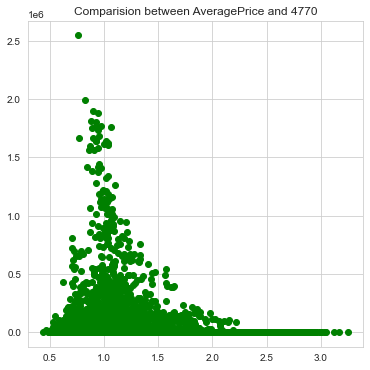

In [54]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4770')
plt.scatter('AveragePrice','4770',data=df_av,color='green')

<AxesSubplot:title={'center':'Comparision Total Bags and Small Bags'}, xlabel='Total Bags', ylabel='Small Bags'>

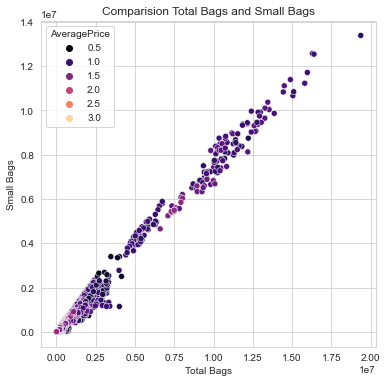

In [55]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df_av['Total Bags'],df_av['Small Bags'],hue=df_av["AveragePrice"],palette='magma')

<AxesSubplot:title={'center':'Comparision Total Bags and Large Bags'}, xlabel='Total Bags', ylabel='Large Bags'>

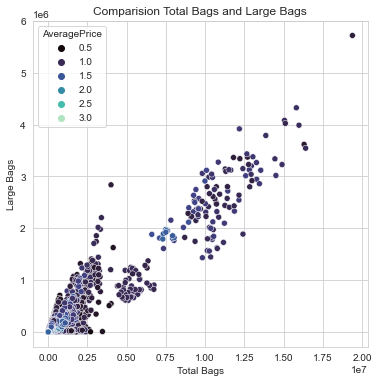

In [56]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and Large Bags')
sns.scatterplot(df_av['Total Bags'],df_av['Large Bags'],hue=df_av["AveragePrice"],palette='mako')

<AxesSubplot:title={'center':'Comparision Total Bags and XLarge Bags'}, xlabel='Total Bags', ylabel='XLarge Bags'>

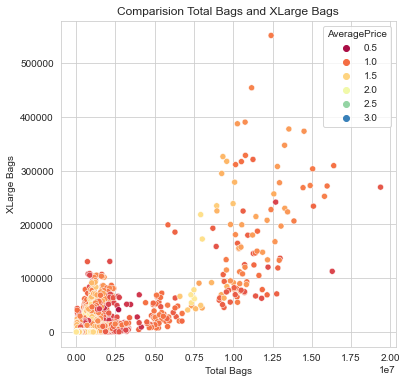

In [57]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and XLarge Bags')
sns.scatterplot(df_av['Total Bags'],df_av['XLarge Bags'],hue=df_av["AveragePrice"],palette='Spectral')

<AxesSubplot:title={'center':'Comparision between Region and Type'}, xlabel='region', ylabel='count'>

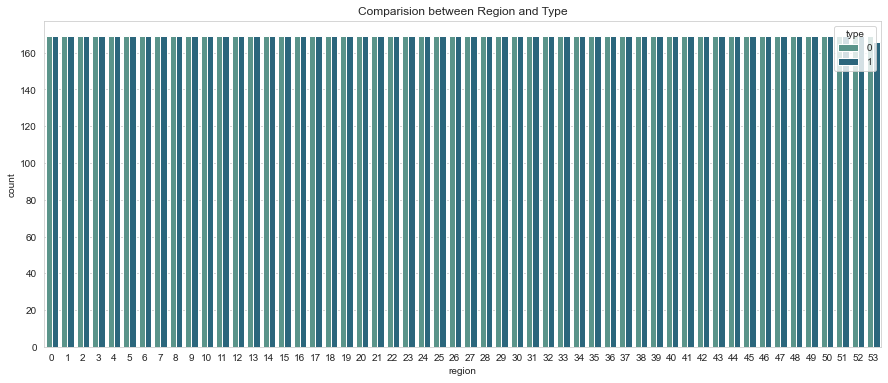

In [63]:
plt.figure(figsize=[15,6])
plt.title('Comparision between Region and Type')
sns.set_style('whitegrid')
sns.countplot(x='region',hue='type',data=df_av,palette='crest')

<AxesSubplot:title={'center':'Comparision Total Bags and Small Bags'}, xlabel='Total Bags', ylabel='Small Bags'>

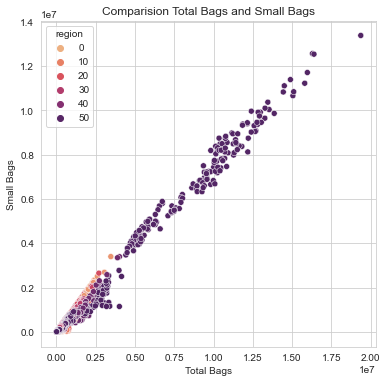

In [64]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df_av['Total Bags'],df_av['Small Bags'],hue=df_av["region"],palette='flare')

<AxesSubplot:title={'center':'Comparision Total Bags and Large Bags'}, xlabel='Total Bags', ylabel='Large Bags'>

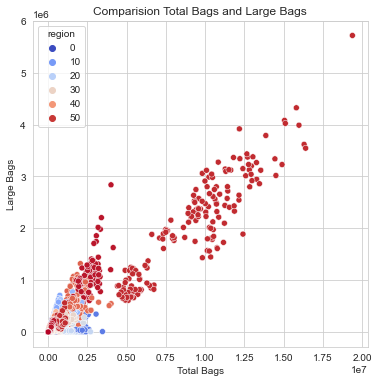

In [65]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and Large Bags')
sns.scatterplot(df_av['Total Bags'],df_av['Large Bags'],hue=df_av["region"],palette='coolwarm')

<AxesSubplot:title={'center':'Comparision Total Bags and XLarge Bags'}, xlabel='Total Bags', ylabel='XLarge Bags'>

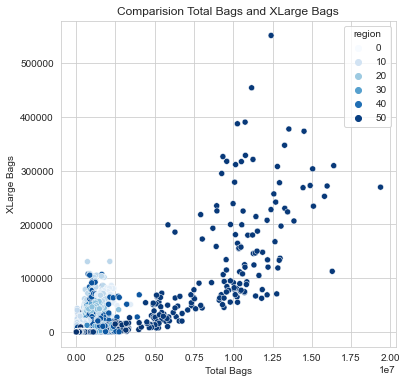

In [66]:
plt.figure(figsize=[6,6])
plt.title('Comparision Total Bags and XLarge Bags')
sns.scatterplot(df_av['Total Bags'],df_av['XLarge Bags'],hue=df_av["region"],palette='Blues')

<AxesSubplot:title={'center':'Comparision between Region and Total Volume'}, xlabel='region', ylabel='Total Volume'>

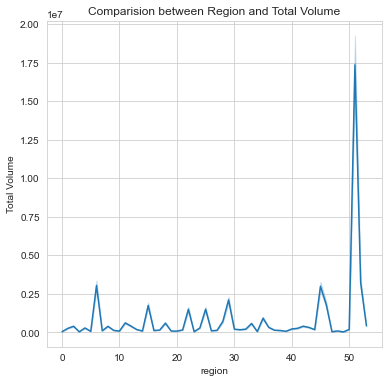

In [67]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Region and Total Volume')
sns.lineplot(df_av['region'],df_av['Total Volume'])

<AxesSubplot:title={'center':'Comparision between Region and Total Bags'}, xlabel='region', ylabel='Total Bags'>

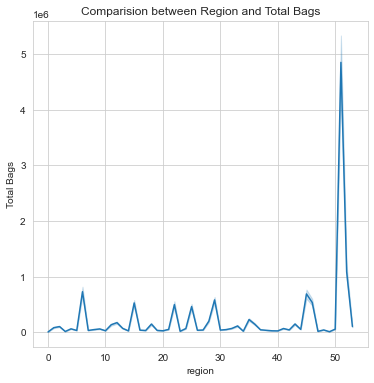

In [68]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Region and Total Bags')
sns.lineplot(df_av['region'],df_av['Total Bags'])

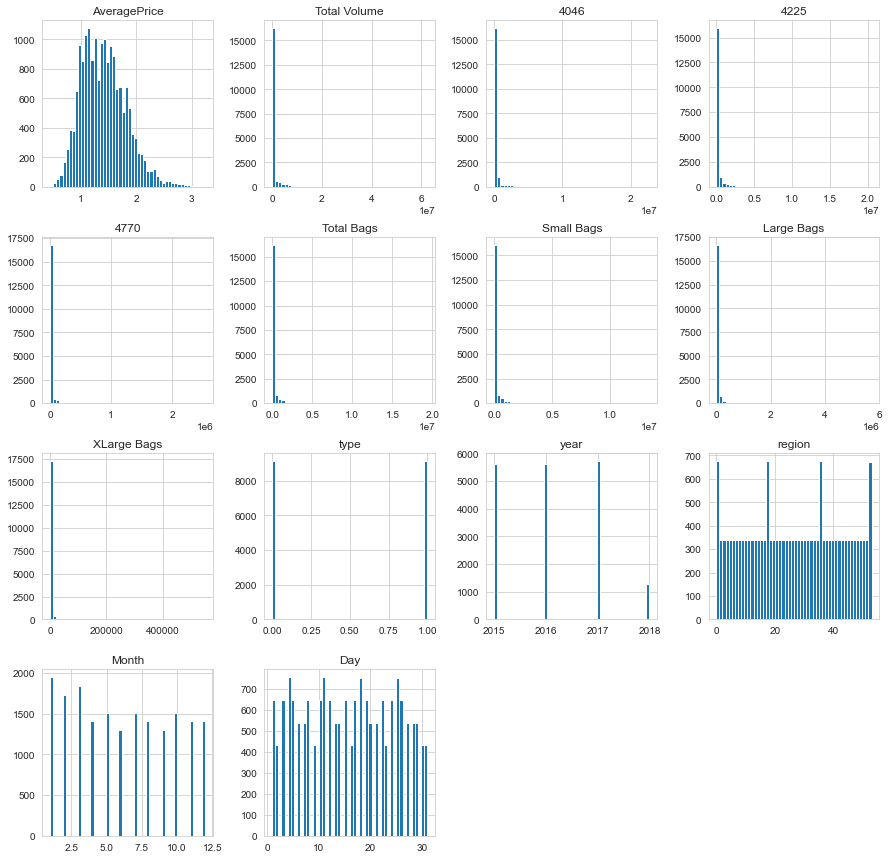

In [69]:
df_av.hist(figsize=(15,15),bins=50)
plt.show()

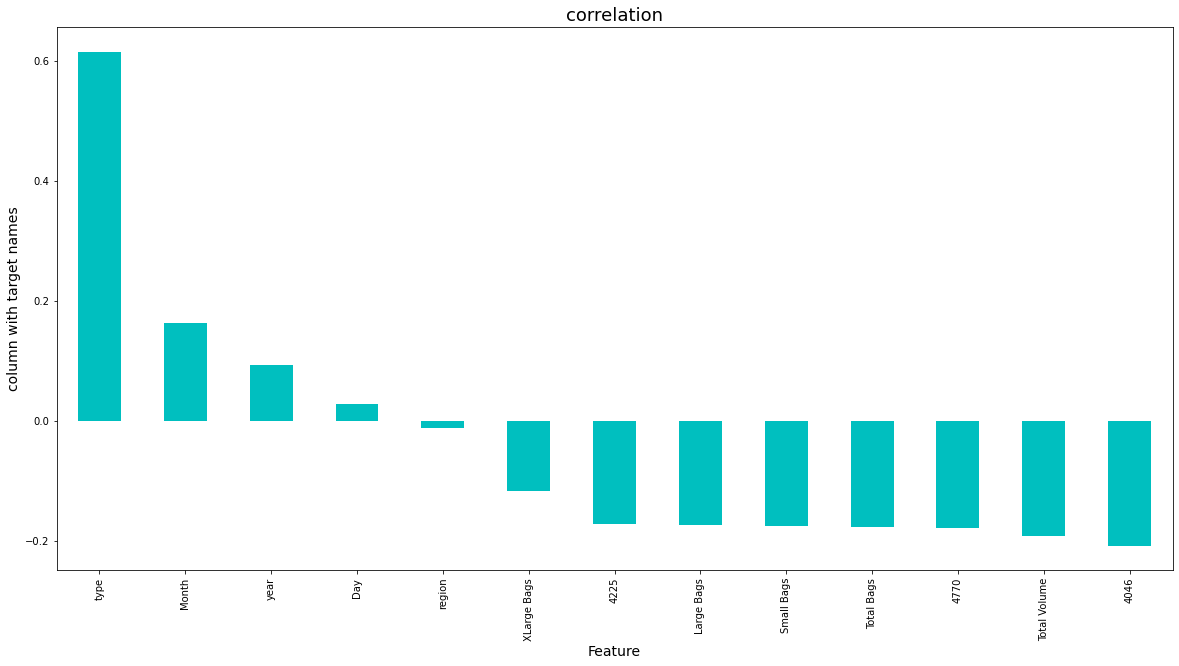

In [54]:
plt.figure(figsize=(20,10))
df_av.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Encoding the Data Frame

In [32]:
df_av.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [33]:
df_av.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

Label Encoder is used to encode the dataframe to make it easier to build the model.

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df_av['type'] = le.fit_transform(df_av['type'])
df_av['region'] = le.fit_transform(df_av['region'])

In [36]:
df_av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


# Outliers

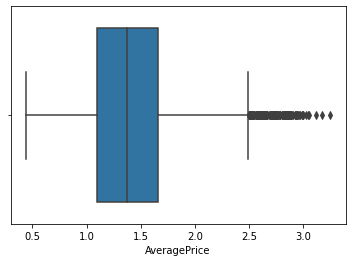

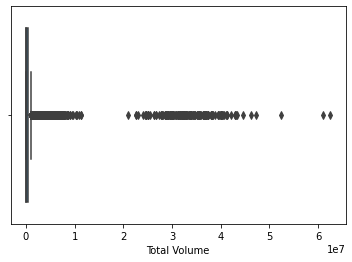

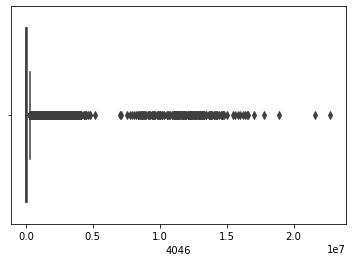

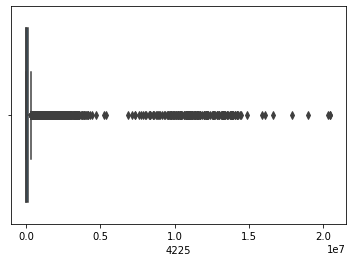

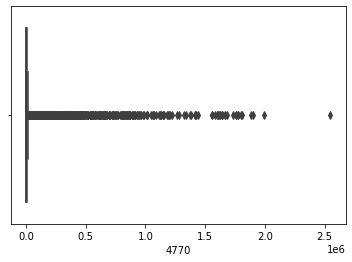

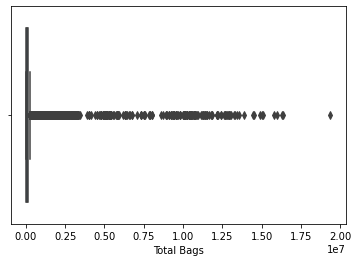

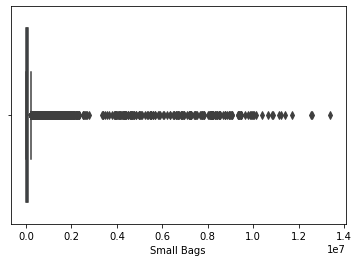

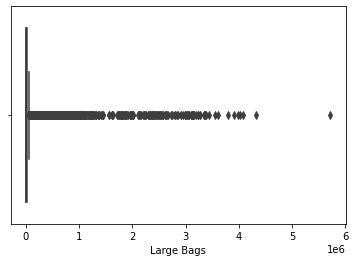

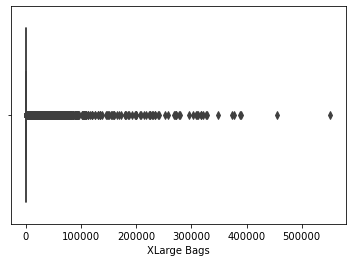

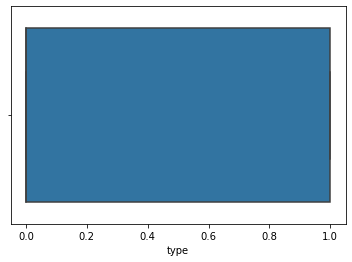

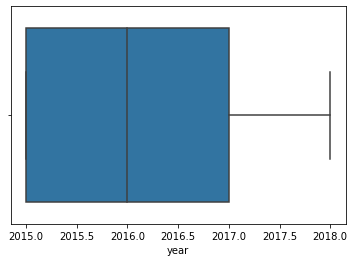

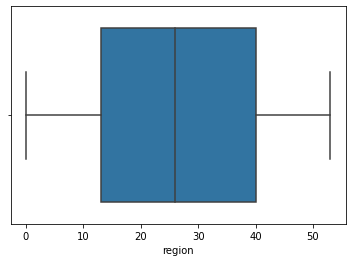

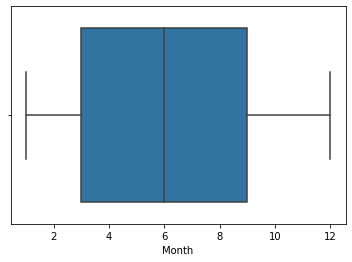

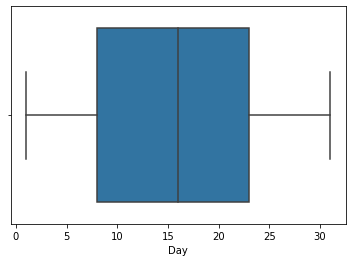

In [37]:
for i in df_av.columns:
    sns.boxplot(df_av[i])
    plt.show()

AveragePrice       AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Total Volume    AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
4046            AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
4225            AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
4770            AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
Total Bags      AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
Small Bags      AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
Large Bags      AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
XLarge Bags     AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
type            AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
year            AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
region                AxesSubplot(0.125,0.125;0.0596154x0.343182)
Month              AxesSubplot(0.196538,0.125;0.0596154x0.343182)
Day                AxesSubplot(0.268077,0.125;0.0596154x0.343182)
dtype: object

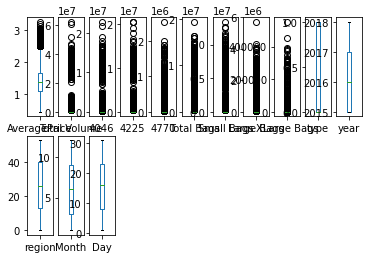

In [38]:
df_av.plot(kind='box',subplots=True,layout=(2,11))

We can see a significant number of outliers present in Average Price, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags & XLarge Bags.

# Removing Outliers

We shall remove the outliers using Z-Score method.

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(df_av))
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [40]:
# New data frame
df_new_av=df_av[(z<3).all(axis=1)]
df_new_av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [41]:
df_new_av.shape

(17651, 14)

In [42]:
df_av.shape

(18249, 14)

In [43]:
Data_loss=((18249-17651)/18249)*100
Data_loss

3.276891884486821

Data loss after removing outliers with z-score is 3.27 %.

# Skewness

In [44]:
df_new_av.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [45]:
# Using Power Transform to remove skewness
from sklearn.preprocessing import power_transform
df_av_new=power_transform(df_new_av)

In [46]:
df_av_new

array([[-0.11782446, -0.07532391, -0.65742071, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.06432986, -0.14749743, -0.77717852, ..., -2.01058988,
         1.49138301,  0.53822879],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [ 1.31329624, -0.70179733, -0.54701087, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [ 0.61561867, -0.66738095, -0.35967077, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

In [47]:
type(df_av_new)

numpy.ndarray

In [48]:
df_av.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [49]:
df_avocado=pd.DataFrame(df_av_new,columns=df_av.columns)

In [50]:
df_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,1.227565
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,0.538229
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,-0.218959
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,-1.094426
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210647,-2.010590,1.276081,1.415364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.978707,1.578282,-1.218907,-1.384767
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.978707,1.578282,-1.640288,1.321911
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.978707,1.578282,-1.640288,0.640195
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.978707,1.578282,-1.640288,-0.105299


In [51]:
df_avocado.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region         -0.257799
Month          -0.146554
Day            -0.208926
dtype: float64

In [52]:
df_avocado[np.abs(df_avocado)>0.25].all()

AveragePrice    True
Total Volume    True
4046            True
4225            True
4770            True
Total Bags      True
Small Bags      True
Large Bags      True
XLarge Bags     True
type            True
year            True
region          True
Month           True
Day             True
dtype: bool

# Regression Model Building & Hyper Parameter Tuning

In [53]:
df_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,1.227565
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,0.538229
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,-0.218959
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210647,-2.010590,1.491383,-1.094426
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210647,-2.010590,1.276081,1.415364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.978707,1.578282,-1.218907,-1.384767
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.978707,1.578282,-1.640288,1.321911
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.978707,1.578282,-1.640288,0.640195
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.978707,1.578282,-1.640288,-0.105299


In [55]:
x = df_avocado.drop("AveragePrice",axis=1)
y = df_avocado["AveragePrice"]

In [56]:
x.shape

(17651, 13)

In [57]:
y.shape

(17651,)

# VIF

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Total Volume,53.829912
1,4046,7.251220
2,4225,11.387028
3,4770,3.953827
4,Total Bags,35.128954
5,Small Bags,16.625127
6,Large Bags,3.460862
7,XLarge Bags,2.057938
8,type,3.702255
9,year,1.402586


We see high multicollinearity in Total Volume, Total Bags, Small Bags & 4225.

We shall drop Total Volume and Total Bags columns to see if the multicollinearity gets better.

In [59]:
# Droping columns
x = x.drop(["Total Volume"],axis=1)
x = x.drop(["Total Bags"],axis=1)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,4046,3.728475
1,4225,4.172197
2,4770,3.940044
3,Small Bags,4.131396
4,Large Bags,1.872064
5,XLarge Bags,2.043535
6,type,3.480493
7,year,1.373075
8,region,1.080711
9,Month,1.058634


After dropping the columns, there is improvement in multicollinearity.

In [61]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Best Random State

In [62]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [63]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.7936059688480757  on Random State : 89


We can see that the Highest testing R2 Score is achieved at random state = 89.

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=89)

In [65]:
x_train.shape

(12355, 11)

In [66]:
x_test.shape

(5296, 11)

In [67]:
y_train.shape

(12355,)

In [68]:
y_test.shape

(5296,)

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
lr.coef_

array([-0.20186193,  0.3314647 ,  0.08356073, -0.15644611, -0.31978378,
        0.01700699,  0.51841234,  0.21862021,  0.04413996,  0.19874735,
        0.02971193])

In [71]:
lr.intercept_

-0.0009544461181982899

In [72]:
lr.score(x_train,y_train)

0.5180048179675305

In [73]:
# Predicting the value
pred_lr=lr.predict(x_test)
print("Predicted value: ",pred_lr)
print("Actual value: ",y_test)

Predicted value:  [ 1.26603983  0.24886971  0.53382419 ...  1.08580481 -0.88497532
  0.92709368]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Error:
Mean absolute error:  0.5542730101891525
Mean squared error:  0.48624949216020324
Root Mean squared error:  0.6973159199101963


In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_lr))

0.5167008916545822


In [76]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.11313285888613125

# Lasso Regression

We will use GridSearchCV to find the best parameters for this model.

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ls= Lasso()
parameters1 = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],'selection':['cyclic','random'],'random_state':list(range(0,10))}
gd1= GridSearchCV(ls,parameters1)
gd1.fit(x_train,y_train)

print(gd1.best_params_)

{'alpha': 0.0001, 'random_state': 3, 'selection': 'random'}


In [84]:
ls1 = Lasso(alpha=0.0001,random_state=3,selection='random')
ls1.fit(x_train,y_train)

Lasso(alpha=0.0001, random_state=3, selection='random')

In [85]:
ls1.score(x_train,y_train)

0.5180044505695733

In [86]:
ls1.coef_

array([-0.20166807,  0.33077494,  0.08303685, -0.15585692, -0.31948192,
        0.01677604,  0.51795384,  0.21833143,  0.04399361,  0.19858471,
        0.02961303])

In [87]:
pred_ls=ls1.predict(x_test)
print("Predicted value: ",pred_ls)
print("Actual value: ",y_test)

Predicted value:  [ 1.26495753  0.24861463  0.53317121 ...  1.08498959 -0.88380367
  0.92558745]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_ls))
print('Mean squared error: ',mean_squared_error(y_test,pred_ls))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean absolute error:  0.5542611793103701
Mean squared error:  0.48624000485144864
Root Mean squared error:  0.6973091171435009


In [89]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_ls))

0.5167103213978224


In [90]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.11318950120873068

# Ridge Regression

We will use GridSearchCV to find the best parameters for this model.

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rd = Ridge()
parameters2 = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],'random_state':list(range(0,10)),'solver':['auto','svg']}
gd2= GridSearchCV(rd,parameters2)
gd2.fit(x_train,y_train)

print(gd2.best_params_)

{'alpha': 10, 'random_state': 0, 'solver': 'auto'}


In [92]:
rd1 = Ridge(alpha=10,random_state=0,solver='auto')
rd1.fit(x_train,y_train)

Ridge(alpha=10, random_state=0)

In [93]:
rd1.score(x_train,y_train)

0.5180031872843551

In [94]:
rd1.coef_

array([-0.20179601,  0.32965556,  0.08282863, -0.15565205, -0.31904412,
        0.01671086,  0.51686112,  0.21811187,  0.04408781,  0.1984514 ,
        0.02968168])

In [95]:
pred_rd=rd1.predict(x_test)
print("Predicted value: ",pred_rd)
print("Actual value: ",y_test)

Predicted value:  [ 1.26406199  0.24682372  0.5323324  ...  1.08447209 -0.88157339
  0.92438448]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rd))
print('Mean squared error: ',mean_squared_error(y_test,pred_rd))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean absolute error:  0.5542640668694716
Mean squared error:  0.4862410463976731
Root Mean squared error:  0.6973098639756024


In [97]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rd))

0.5167092861713188


In [98]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rd1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.11331457513202281

# Decision Tree Regressor

We will use GridSearchCV to find the best parameters for this model.

In [99]:
from sklearn.tree import DecisionTreeRegressor

parameters3 = {'criterion':['squared_error','absolute_error'],'random_state':[0,1,2], 'max_features':["auto", "sqrt","log2"]}
dtr = DecisionTreeRegressor()
gd3= GridSearchCV(dtr,parameters3)
gd3.fit(x_train,y_train)

print(gd3.best_params_)

{'criterion': 'squared_error', 'max_features': 'auto', 'random_state': 2}


In [100]:
dt = DecisionTreeRegressor(criterion="squared_error",max_features="auto",random_state=2)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [101]:
pred_dtr=dt.predict(x_test)
print("Predicted value: ",pred_dtr)
print("Actual value: ",y_test)

Predicted value:  [ 1.86219948  0.47089827  1.05257377 ...  0.94057375 -1.23411062
 -0.8592574 ]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean absolute error:  0.34661609090079676
Mean squared error:  0.2693671352134581
Root Mean squared error:  0.5190059105766119


In [103]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_dtr))

0.7322672858991239


In [104]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.2168155091622607

# KNearest Neighbors Regressor

We will use GridSearchCV to find the best parameters for this model.

In [105]:
from sklearn import neighbors

parameters4 = {'n_neighbors':[2,3,4,5,6,7],'algorithm':['auto','kd_tree','ball_tree'],'weights':['uniform','distance']}
knn=neighbors.KNeighborsRegressor()
gd4=GridSearchCV(knn,parameters4)
gd4.fit(x_train,y_train)

print(gd4.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [106]:
kn=neighbors.KNeighborsRegressor(algorithm='auto',n_neighbors=5,weights='distance')
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

1.0

In [107]:
pred_knn = kn.predict(x_test)
print("Predicted value: ",pred_knn)
print("Actual value: ",y_test)

Predicted value:  [ 1.4071727   0.28291292  0.73636616 ...  1.30826485 -0.59488704
  0.92316397]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

Error:
Mean absolute error:  0.33297963488083554
Mean squared error:  0.199659989713013
Root Mean squared error:  0.44683329073941325


In [109]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_knn))

0.8015514739730312


In [110]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(kn,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.11362199774451476

# SVR

We will use GridSearchCV to find the best parameters for this model.

In [111]:
from sklearn.svm import SVR

parameters5={'kernel':['linear','poly','rbf'],'degree':[0,1,2],'gamma':['scale','auto']}
svr=SVR()
gd5=GridSearchCV(svr,parameters5)
gd5.fit(x_train,y_train)

print(gd5.best_params_)

{'degree': 0, 'gamma': 'auto', 'kernel': 'rbf'}


In [112]:
sv=SVR(degree=0,gamma='auto',kernel='rbf')
sv.fit(x_train,y_train)

SVR(degree=0, gamma='auto')

In [113]:
sv.score(x_train,y_train)

0.784550366151898

In [114]:
pred_svr = sv.predict(x_test)
print("Predicted value: ",pred_svr)
print("Actual value: ",y_test)

Predicted value:  [ 1.08059333  0.61572015  0.91876048 ...  1.18755581 -0.55565299
  0.69414489]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

Error:
Mean absolute error:  0.3686308182949435
Mean squared error:  0.2316198930010298
Root Mean squared error:  0.4812690442995787


In [116]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_svr))

0.7697854916718809


In [117]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(sv,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.12396476310942586

# Random Forest Regressor

We will use GridSearchCV to find the best parameters for this model.

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters6 = {'criterion':['mse','mae'], 'max_features':["auto", "sqrt"],'n_estimators':[5,10,100]}
rfr =RandomForestRegressor()
gd6= GridSearchCV(rfr,parameters6)
gd6.fit(x_train,y_train)

print(gd6.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 100}


In [122]:
rf = RandomForestRegressor(criterion="mse",max_features="auto",n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='mse')

In [123]:
rf.score(x_train, y_train)

0.9840106615654203

In [124]:
pred_rfr = rf.predict(x_test)
print("Predicted value: ",pred_rfr)
print("Actual value: ",y_test)

Predicted value:  [ 1.12621135  1.06385426  0.79437863 ...  0.70042241 -0.70021022
 -0.20336473]
Actual value:  16511    0.985620
16872    0.895194
13283    1.030337
14128    0.145107
13030    0.247205
           ...   
11897    0.397237
13240    0.145107
16209    0.615619
5146    -1.043833
16453   -0.505923
Name: AveragePrice, Length: 5296, dtype: float64


In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

Error:
Mean absolute error:  0.24467086737735405
Mean squared error:  0.11432568471380344
Root Mean squared error:  0.3381208137837768


In [126]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rfr))

0.8863680016657861


In [127]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.25537775256499523

In [128]:
# R2 scores of all models:
R1 = r2_score(y_test,pred_lr).copy()
R2 = r2_score(y_test,pred_ls).copy()
R3 = r2_score(y_test,pred_rd).copy()
R4 = r2_score(y_test,pred_dtr).copy()
R5 = r2_score(y_test,pred_knn).copy()
R6 = r2_score(y_test,pred_svr).copy()
R7 = r2_score(y_test,pred_rfr).copy()

In [129]:
# Cross Validation of all the models:
C1 = cross_val_score(lr,x,y,cv=5).mean().copy()
C2 = cross_val_score(ls1,x,y,cv=5).mean().copy()
C3 = cross_val_score(rd1,x,y,cv=5).mean().copy()
C4 = cross_val_score(dt,x,y,cv=5).mean().copy()
C5 = cross_val_score(kn,x,y,cv=5).mean().copy()
C6 = cross_val_score(sv,x,y,cv=5).mean().copy()
C7 = cross_val_score(rf,x,y,cv=5).mean().copy()

In [130]:
Score_table = pd.DataFrame({'Model_Names':['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','KNearest Neighbors Regressor','SVR','Random Forest Regressor'],'R2_Score':[R1,R2,R3,R4,R5,R6,R7],'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6,C7]})
Score_table

,Model_Names,R2_Score,Cross_Validation_Score
0,Linear Regression,0.516701,0.113133
1,Lasso Regression,0.516710,0.113190
2,Ridge Regression,0.516709,0.113315
3,Decision Tree Regressor,0.732267,-0.216816
4,KNearest Neighbors Regressor,0.801551,0.113622
5,SVR,0.769785,0.123965
6,Random Forest Regressor,0.886368,0.250650


From the above table, we can see that the highest R2 score belongs to Random Forest Regressor. Next in line is the KNearest Neighbors Regressor, followed by SVR model and Decision Tree Regressor. Linear, Lasso & Ridge Regression have the lowest R2 scores.

The highest Cross Validation Score belongs to Random Forest Regressor. Followed by SVR model. Next, Linear, Lasso, Ridge Regression & KNearest Neighbors Regressor. Decision Tree Regressor has a negative Cross Validation Score.

# Saving the Model

In [131]:
import joblib
joblib.dump(rf,"Avocado_Regn.pkl")

['Avocado_Regn.pkl']

# Prediction

In [132]:
# Loading the saved model
Avocado_Regression_Model=joblib.load("Avocado_Regn.pkl")

#Prediction
prediction = Avocado_Regression_Model.predict(x_test)
prediction

array([ 1.12621135,  1.06385426,  0.79437863, ...,  0.70042241,
       -0.70021022, -0.20336473])

In [133]:
pd.DataFrame([Avocado_Regression_Model.predict(x_test)[:],y_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predictions,1.126211,1.063854,0.794379,0.168721,0.421065,0.666094,-0.841090,-0.261403,0.082708,0.079488,...,-1.872854,-1.309630,-0.786767,1.270866,0.731117,0.957506,0.638974,0.700422,-0.700210,-0.203365
Original Values,0.985620,0.895194,1.030337,0.145107,0.247205,0.803412,-0.592372,-1.364306,0.093414,0.015048,...,-1.667702,-1.950507,-0.981691,1.184324,0.615619,0.397237,0.145107,0.615619,-1.043833,-0.505923


# Classification Model Building

In [44]:
# Dataset after removing outliers.
df_new_av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


# Skewness

In [45]:
df_new_av.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

We can see skewness present in AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year.

In [46]:
df_skew=["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","year"]

In [47]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [48]:
df_new_av[df_skew] = scal.fit_transform(df_new_av[df_skew].values)

In [49]:
df_new_av[df_skew].skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
dtype: float64

Skewness is removed.

In [50]:
df_new_av.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [51]:
df_new_av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,-1.210647,0,12,27
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,-1.210647,0,12,20
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,-1.210647,0,12,13
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,-1.210647,0,12,6
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,-1.210647,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,1.978707,53,2,4
8,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,1.978707,53,1,28
9,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,1.978707,53,1,21
10,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,1.978707,53,1,14


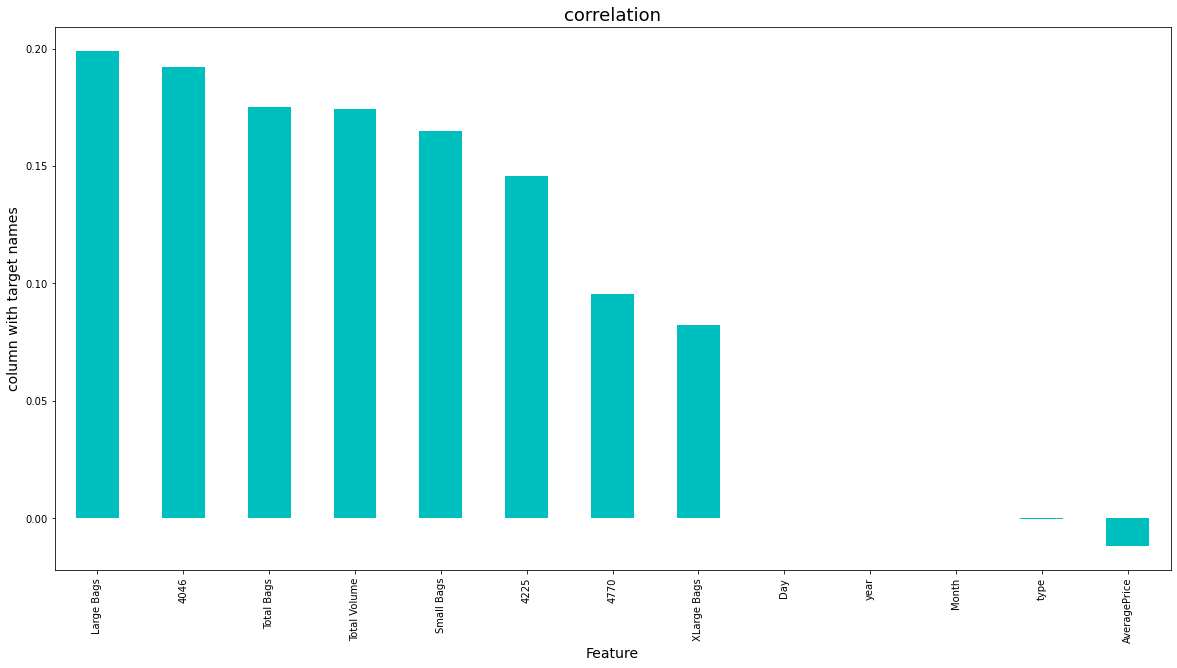

In [52]:
plt.figure(figsize=(20,10))
df_av.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can see above that, Day, year, month have no correlation towards our target variable for classification " region ". So we shall drop these columns.

In [53]:
# Dropping columns
df_new_av = df_new_av.drop(["Day"],axis=1)
df_new_av = df_new_av.drop(["Month"],axis=1)
df_new_av = df_new_av.drop(["year"],axis=1)

In [54]:
x1 = df_new_av.drop("region",axis=1)
y1 = df_new_av["region"]

In [55]:
x1.shape

(17651, 10)

In [56]:
y1.shape

(17651,)

In [57]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x1=scale.fit_transform(x1)

# Best Random State

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [60]:
maxAccu1=0
maxRS1=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = i)
    lgr=LogisticRegression()
    lgr.fit(x1_train,y1_train)
    pred_rs=lgr.predict(x1_test)
    acc=accuracy_score(y1_test,pred_rs)
    if acc>maxAccu1:
        maxAccu1=acc
        maxRS1=i
print("Best accuracy is :",maxAccu1," on Random State :",maxRS1)

Best accuracy is : 0.5222809667673716  on Random State : 2


In [61]:
# dividing the dataset for training and testing
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = 2)

In [62]:
x1_train.shape

(12355, 10)

In [63]:
y1_train.shape

(12355,)

In [64]:
x1_test.shape

(5296, 10)

In [65]:
y1_test.shape

(5296,)

In [66]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x1_train = sc1.fit_transform(x1_train)
x1_test = sc1.fit_transform(x1_test)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
lg=LogisticRegression()
lg.fit(x1_train, y1_train)
lg.score(x1_train, y1_train)
pred_lg=lg.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_lg))
print(confusion_matrix(y1_test,pred_lg))
print(classification_report(y1_test,pred_lg))

accuracy score:  0.521714501510574
[[65  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  5]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  1 70  0]
 [ 0  2  1 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       107
           1       0.27      0.47      0.34        98
           2       0.71      0.65      0.68        94
           3       0.58      0.42      0.49        99
           4       0.50      0.49      0.50       113
           5       0.52      0.57      0.54        93
           6       0.69      0.85      0.77        82
           7       0.53      0.56      0.55       107
           8       0.68      0.73      0.71        86
           9       0.55      0.82      0.66        97
          10       0.42      0.37      0.39       101
          11       0.52      0.67      0.59       105
          12       0.54      0.46      0.50       108
          13       0.38      0.26      0.31       10

# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
dtc.score(x1_train,y1_train)
pred_dtc=dtc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_dtc))
print(confusion_matrix(y1_test,pred_dtc))
print(classification_report(y1_test,pred_dtc))

accuracy score:  0.7688821752265861
[[85  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 85 ...  0  0  2]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  1 72  0]
 [ 0  5  3 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       107
           1       0.60      0.62      0.61        98
           2       0.81      0.90      0.85        94
           3       0.80      0.79      0.79        99
           4       0.81      0.81      0.81       113
           5       0.73      0.76      0.75        93
           6       0.93      0.94      0.93        82
           7       0.79      0.78      0.78       107
           8       0.91      0.91      0.91        86
           9       0.73      0.79      0.76        97
          10       0.67      0.60      0.64       101
          11       0.92      0.83      0.87       105
          12       0.81      0.81      0.81       108
          13       0.70      0.73      0.71       1

# KNearest Neighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knc=KNeighborsClassifier(n_neighbors = 5)
knc.fit(x1_train,y1_train)
knc.score(x1_train,y1_train)
pred_knc=knc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_knc))
print(confusion_matrix(y1_test,pred_knc))
print(classification_report(y1_test,pred_knc))

accuracy score:  0.831570996978852
[[96  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  2 82  0]
 [ 0  2  0 ...  0  0 66]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.60      0.69      0.64        98
           2       0.95      0.99      0.97        94
           3       0.84      0.77      0.80        99
           4       0.85      0.88      0.86       113
           5       0.76      0.80      0.78        93
           6       0.99      1.00      0.99        82
           7       0.83      0.85      0.84       107
           8       0.98      0.97      0.97        86
           9       0.72      0.81      0.77        97
          10       0.70      0.75      0.73       101
          11       0.85      0.95      0.90       105
          12       0.94      0.93      0.93       108
          13       0.71      0.81      0.76       10

# GaussianNB Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
gnb=GaussianNB()
gnb.fit(x1_train,y1_train)
gnb.score(x1_train,y1_train)
pred_gnb=gnb.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_gnb))
print(confusion_matrix(y1_test,pred_gnb))
print(classification_report(y1_test,pred_gnb))

accuracy score:  0.05777945619335347
[[30  0  0 ...  0  0  0]
 [ 5  0  0 ...  0 19  8]
 [12  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0 15  0]
 [27  0  0 ...  0 23  7]]
              precision    recall  f1-score   support

           0       0.05      0.28      0.08       107
           1       0.00      0.00      0.00        98
           2       0.00      0.00      0.00        94
           3       0.13      0.30      0.18        99
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00        93
           6       0.33      0.01      0.02        82
           7       0.06      0.04      0.05       107
           8       0.00      0.00      0.00        86
           9       0.08      0.12      0.09        97
          10       0.00      0.00      0.00       101
          11       0.00      0.00      0.00       105
          12       0.01      0.02      0.01       108
          13       0.04      0.02      0.02       

# Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()
svc.fit(x1_train, y1_train)
svc.score(x1_train, y1_train)
svc_pred = svc.predict(x1_test)
print("accuracy score: ",accuracy_score(y1_test,svc_pred))
print(confusion_matrix(y1_test,svc_pred))
print(classification_report(y1_test,svc_pred))

accuracy score:  0.7651057401812689
[[96  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  2 76  0]
 [ 0  2  3 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       107
           1       0.49      0.66      0.56        98
           2       0.94      0.89      0.92        94
           3       0.73      0.67      0.70        99
           4       0.83      0.78      0.80       113
           5       0.77      0.67      0.71        93
           6       0.98      0.99      0.98        82
           7       0.81      0.76      0.78       107
           8       0.97      0.98      0.97        86
           9       0.72      0.84      0.77        97
          10       0.57      0.54      0.56       101
          11       0.85      0.95      0.90       105
          12       0.92      0.96      0.94       108
          13       0.61      0.62      0.62       1

# Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
rfc.score(x1_train,y1_train)
pred_rfc=rfc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_rfc))
print(confusion_matrix(y1_test,pred_rfc))
print(classification_report(y1_test,pred_rfc))

accuracy score:  0.8802870090634441
[[95  0  0 ...  0  0  0]
 [ 0 81  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  2 81  0]
 [ 0  1  1 ...  0  0 65]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.78      0.83      0.80        98
           2       0.93      0.98      0.95        94
           3       0.87      0.87      0.87        99
           4       0.91      0.94      0.93       113
           5       0.81      0.82      0.81        93
           6       0.95      1.00      0.98        82
           7       0.91      0.88      0.90       107
           8       0.96      0.99      0.97        86
           9       0.90      0.87      0.88        97
          10       0.83      0.77      0.80       101
          11       0.91      0.95      0.93       105
          12       0.93      0.94      0.94       108
          13       0.83      0.81      0.82       1

From the above models, the highest accuracy score belongs to Random Forest Classifier. Next, KNearest Neighbors Classifier & Decision Tree Classifier. Followed by SVC, Logistic regression and finally GaussianNB Classifier.

# Cross Validation Score

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
scr_lg=cross_val_score(lg,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.3765788728405551


In [83]:
scr_dtc=cross_val_score(dtc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.5496613483328158


In [84]:
scr_knc=cross_val_score(knc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_knc.mean())

Cross validation score of this model is:  0.5944133506305543


In [85]:
scr_gnb=cross_val_score(gnb,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.04050768466748981


In [86]:
scr_svc=cross_val_score(svc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.6051773406405266


In [87]:
scr_rfc=cross_val_score(rfc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.666367495344753


From the above observations, the highest cross validation score once again belongs to Random Forest Classifier, followed by SVC and KNearest Neighbors Classifier. Next, Decision Tree Classifier and Logistic Regression. Lastly, GaussianNB Classifier.

# Hyper Parameter Tuning

Since the Cross Validation Score and Accuracy Score of Random Forest Classifier are both high, we shall consider this for hyper parameter tuning.

In [88]:
# Using GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [89]:
parameters_grid={
    'bootstrap': [True, False],
    'max_depth': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters_grid, scoring = 'accuracy', cv = 10)

In [90]:
grid_rfc.fit(x1_train, y1_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [92]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [94]:
rfc1=RandomForestClassifier(bootstrap=False,max_depth=20,max_features='auto',n_estimators=200,criterion='entropy')

rfc1.fit(x1_train,y1_train)
pred_rf1=rfc1.predict(x1_test)
print("accuracy score: ",accuracy_score(y1_test,pred_rf1))
print(confusion_matrix(y1_test,pred_rf1))
print(classification_report(y1_test,pred_rf1))

accuracy score:  0.8874622356495468
[[98  0  0 ...  0  0  0]
 [ 0 84  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  1 83  0]
 [ 0  0  1 ...  0  0 70]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.82      0.86      0.84        98
           2       0.92      0.98      0.95        94
           3       0.92      0.88      0.90        99
           4       0.91      0.92      0.92       113
           5       0.84      0.83      0.83        93
           6       0.95      1.00      0.98        82
           7       0.90      0.87      0.89       107
           8       0.94      0.99      0.97        86
           9       0.91      0.86      0.88        97
          10       0.86      0.76      0.81       101
          11       0.94      0.97      0.95       105
          12       0.95      0.97      0.96       108
          13       0.83      0.84      0.83       1

# Saving the Model

In [97]:
import joblib
joblib.dump(rfc1,"Avocado_Classfn.pkl")

['Avocado_Classfn.pkl']

# Prediction

In [98]:
# Loading the saved model
Avocado_Classification_model=joblib.load("Avocado_Classfn.pkl")

#Prediction
prediction = Avocado_Classification_model.predict(x1_test)
prediction

array([20, 47, 31, ..., 25, 31, 24])

In [99]:
pd.DataFrame([Avocado_Classification_model.predict(x1_test)[:],y1_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predicted Value,20,47,31,51,39,25,43,30,23,25,...,4,2,43,42,7,46,30,25,31,24
Actual Value,20,47,24,51,39,25,43,30,23,25,...,4,2,36,42,7,46,30,25,31,24
